# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`

## We'll take over the NotMNIST dataset and use a basic ANN to classify the digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys, os


In [3]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz

--2020-06-02 12:39:31--  http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247336696 (236M) [application/x-gzip]
Saving to: ‘notMNIST_large.tar.gz.2’

notMNIST_large.tar. 100%[===================>] 235.88M  55.4MB/s    in 4.6s    

2020-06-02 12:39:36 (51.4 MB/s) - ‘notMNIST_large.tar.gz.2’ saved [247336696/247336696]

--2020-06-02 12:39:37--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8458043 (8.1M) [application/x-gzip]
Saving to: ‘notMNIST_small.tar.gz.2’

notMNIST_small.tar. 100%[===================>]   8.07M  17.5MB/s    in 0.5s    

2020-06-02 12:39:38 (17.5 MB/s) - ‘notMNIST_s

In [4]:
!ls 

notMNIST_large		 notMNIST_large.tar.gz.2  notMNIST_small.tar.gz.1
notMNIST_large.tar.gz	 notMNIST_small		  notMNIST_small.tar.gz.2
notMNIST_large.tar.gz.1  notMNIST_small.tar.gz	  sample_data


In [0]:
!tar -xzf notMNIST_large.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [6]:
!ls

notMNIST_large		 notMNIST_large.tar.gz.2  notMNIST_small.tar.gz.1
notMNIST_large.tar.gz	 notMNIST_small		  notMNIST_small.tar.gz.2
notMNIST_large.tar.gz.1  notMNIST_small.tar.gz	  sample_data


In [7]:
!ls notMNIST_large

A  B  C  D  E  F  G  H	I  J


In [8]:
!ls notMNIST_small

A  B  C  D  E  F  G  H	I  J


In [0]:
path = 'notMNIST_large'
path_val = 'notMNIST_small'

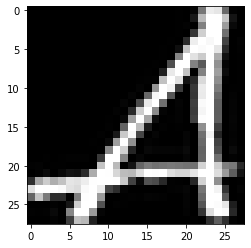

In [10]:
plt.imshow(image.load_img(path + '/A/ZGVhckpvZSBJdGFsaWMudHRm.png'))
plt.show()

In [0]:
IMAGE_SIZE = [28,28]
train_images = glob(path + '/*/*.png')
validation_images = glob(path_val + '/*/*.png')

In [0]:
# Number of classes 
classes = glob(path + '/*')

In [13]:
print(classes)

['notMNIST_large/F', 'notMNIST_large/C', 'notMNIST_large/A', 'notMNIST_large/E', 'notMNIST_large/B', 'notMNIST_large/G', 'notMNIST_large/J', 'notMNIST_large/D', 'notMNIST_large/I', 'notMNIST_large/H']


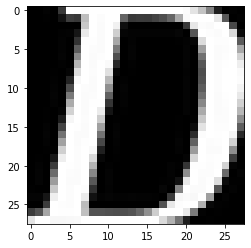

In [14]:
plt.imshow(image.load_img(np.random.choice(train_images)))
plt.show()

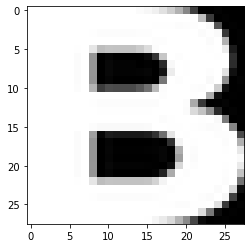

In [15]:
plt.imshow(image.load_img(np.random.choice(validation_images)))
plt.show()

In [0]:
sample = image.load_img(np.random.choice(validation_images))

In [17]:
type(sample)

PIL.Image.Image

In [18]:
sample.size

(28, 28)

In [0]:
Y = len(classes)

In [20]:
Y

10

In [21]:
print(len(train_images))
print(len(validation_images))

529119
18726


In [0]:
batch_size = 254

In [0]:
gen_object = ImageDataGenerator(rescale=1.0/255.0)

In [0]:
I_SIZE = IMAGE_SIZE[0] * IMAGE_SIZE[1]

In [25]:
print(I_SIZE)

784


In [26]:
train_generator = gen_object.flow_from_directory(path, target_size=IMAGE_SIZE, batch_size=1, color_mode="grayscale", shuffle=True)
validation_generator = gen_object.flow_from_directory(path_val, target_size=IMAGE_SIZE, batch_size=1,color_mode="grayscale",  shuffle=True)

Found 529119 images belonging to 10 classes.
Found 18726 images belonging to 10 classes.


In [0]:
N = len(train_images)
N_val = len(validation_images)


In [28]:
train_generator[1][0].shape

(1, 28, 28, 1)

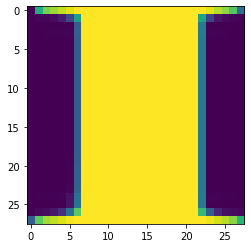

In [29]:
plt.imshow(train_generator[10][0].reshape(28,28))

In [30]:
train_generator[1][1].shape

(1, 10)

In [31]:
len(train_generator)

529119

In [0]:
X_train = np.zeros((N, 28, 28))
y_train = np.zeros((N, Y))

In [33]:
X_train.shape

(529119, 28, 28)

In [0]:
k = 0
while k != N:
  try:
    i = np.random.randint(0, N)
    X_train[k,:] = train_generator[i][0].reshape(28,28)
    y_train[k,:] = train_generator[i][1]
    k+=1
  except:
    pass


In [35]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [36]:
X_train[0, 0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02352941, 0.39607847, 0.70980394, 1.        , 0.99607849,
       0.99607849, 0.99607849, 0.97647065, 0.62352943, 0.34509805,
       0.00784314, 0.        , 0.        , 0.00392157, 0.34509805,
       0.66666669, 0.98823535, 0.99607849, 0.99607849, 0.99607849,
       1.        , 0.67450982, 0.42352945])

In [37]:
X_train.shape

(529119, 28, 28)

In [38]:
y_train.shape

(529119, 10)

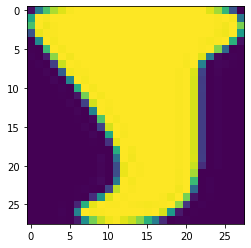

In [39]:
plt.imshow(X_train[10].reshape(28,28))

In [0]:
X_train = X_train.reshape(N, I_SIZE)

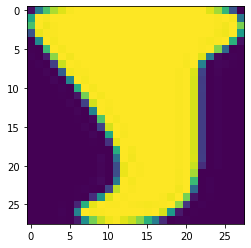

In [41]:
plt.imshow(X_train[10].reshape(28,28))

In [0]:
X_test = np.zeros((N_val, 28, 28))
y_test = np.zeros((N_val, Y))

In [0]:
k = 0
while k != N_val:
  try:
    i = np.random.randint(0, N_val)
    X_test[k,:] = validation_generator[i][0].reshape(28,28)
    y_test[k,:] = validation_generator[i][1]
    k+=1
  except:
    pass


In [44]:
X_test.shape

(18726, 28, 28)

In [45]:
X_train.shape

(529119, 784)

In [0]:
X_test = X_test.reshape(-1, I_SIZE)

In [47]:
X_test.shape

(18726, 784)

In [48]:
y_train.shape

(529119, 10)

In [49]:
y_test.shape

(18726, 10)

In [0]:
i_layer = Input(shape = (I_SIZE,))
h_layer = Dense(256, activation='relu')(i_layer)
h_layer = Dense(512, activation='relu')(h_layer)
h_layer = Dense(1024, activation='relu')(h_layer)
o_layer = Dense(Y, activation='softmax')(h_layer)

model = Model(i_layer, o_layer)

In [61]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 868,106
Trainable params: 868,106
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [53]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 1)

16535/16535 [==============================] - 173s 10ms/step - loss: 0.3728 - accuracy: 0.8859 - val_loss: 0.1781 - val_accuracy: 0.9462


In [56]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))


16535/16535 [==============================] - 48s 3ms/step - loss: 0.3132 - accuracy: 0.9020
Train eval:  [0.3132292926311493, 0.9019880294799805]
586/586 [==============================] - 2s 3ms/step - loss: 0.1781 - accuracy: 0.9462
Test eval:  [0.178140327334404, 0.9462245106697083]


In [0]:
y_pred = model.predict(X_test).argmax(axis=1)

In [58]:
print(y_test.shape)
print(y_pred.shape)

(18726, 10)
(18726,)


In [59]:
y_test = y_test.argmax(axis=1)
print(y_test.shape)
print(y_pred.shape)

(18726,)
(18726,)


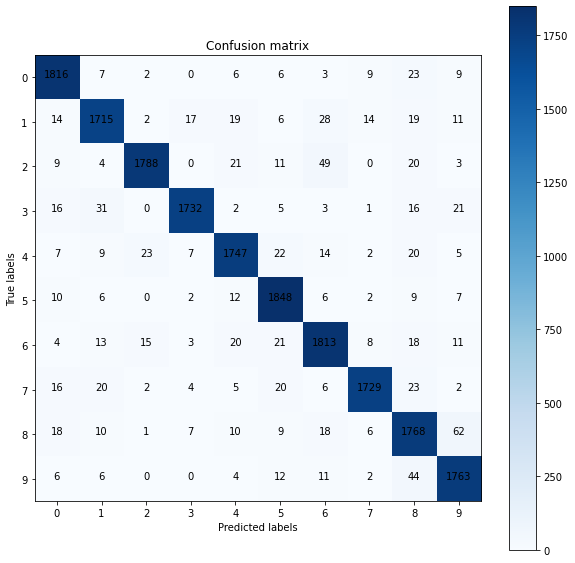

In [60]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i,j], 'd'),
           horizontalalignment = 'center',
           color='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(list(range(10)))
plt.yticks(list(range(10)))
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


In [0]:
labels = "A,B,C,D,E,F,G,H,I,J".split(",")

Text(0.5, 1.0, 'Predicted = G, Real = C')

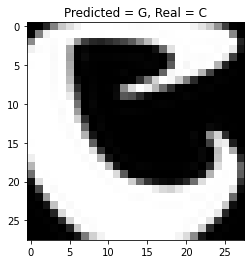

In [67]:
misshits = np.where(y_pred!=y_test)[0]
index = np.random.choice(misshits)
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title("Predicted = " + str(labels[y_pred[index]]) + ", Real = " + str(labels[y_test[index]]))